# Lineární regrese

V tomto notebooku se budeme zabývat využitím lineární regrese k predikci

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation (so 0.000 is printed as 0.)

## Načtení dat

Využijeme data ze serveru Kaggle o cenách domů v oblasti Bostonu v USA [více info zde](https://www.kaggle.com/c/boston-housing).

Data jsou již vyčištěná. Proměnná, kterou chceme predikovat je `medv`.

In [2]:
df = pd.read_csv('boston.csv')
print('Shape', df.shape)
df.head()

Shape (333, 15)


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


### Příprava trénovací a testovací množiny

Využijeme [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) ze `scikit-learn`.

In [4]:
from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(df.drop(columns = ['ID', 'medv']), df['medv'], test_size=0.25, random_state=42)
print('Train X shape', X.shape)
print('Test X shape', X_test.shape)

Train X shape (249, 13)
Test X shape (84, 13)


## Task 1 - proveďte metodu nejmenších čtverců ručně

Používejte pouze maticové operace v [numpy.linalg](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html).

* Vypočtěte odhad $\hat{\boldsymbol w}_{OLS} = (\mathbf{X}^T \mathbf X)^{-1} \mathbf X^T \boldsymbol Y$ a vypište jednotlivé koeficienty.
* Spočtěte hodnotu $\text{RSS}(\hat{\boldsymbol w}_{OLS}) = \lVert \boldsymbol Y - \mathbf X \boldsymbol w \rVert^2$.
* Pro testovací data proveďte predikce $\hat Y_i$ a porovnejte je se skutečnými hodnotami $Y_i$.
Jako míru porovnání použijte RMSE - root mean squared error definovanou pomocí vztahu $\text{RMSE} = \sqrt{\sum_{i}(Y_i - \hat Y_i)^2}$. Můžete použít implementaci [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)
* Nakreslete scatter plot hodnot $Y_i$ a $\hat Y_i$ pro testovací množinu.


w_hat =  [[ 38.20659  -0.07709   0.05966  -0.01475   4.1967  -16.86474   3.55901
   -0.01256  -1.81433   0.40758  -0.01564  -0.77078   0.00752  -0.58124]]
RSS 5649.69059873862
The same RSS [[5649.6906]]
RMSE: 4.799532488947313


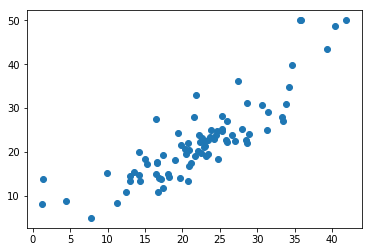

In [10]:
# Your code here

# musíme přidat sloupec jedniček !!!
XX = np.matrix(np.concatenate([np.ones((X.shape[0],1)),np.array(X)], axis = 1))
YY = np.matrix(Y).T
w_hat = (XX.T*XX).I * XX.T*YY
print('w_hat = ', w_hat.T)

RSS = np.linalg.norm(YY - XX*w_hat)**2
print('RSS', RSS)
print('The same RSS', (YY - XX*w_hat).T*(YY - XX*w_hat))

XXt = np.matrix(np.concatenate([np.ones((X_test.shape[0],1)),np.array(X_test)], axis = 1))
Yt_hat = XXt*w_hat
Yth = np.array(Yt_hat).flatten()

plt.scatter(Y_test, Yth)
plt.plot([0,50], [0,50])
plt.show()

from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(Yth, np.array(Y_test))))

## Task 2 - zopakujte metodu nejmenších čtverců s využitím scikit-learn

* Zopakujte postup z předchozího bodu s využitím třídy [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) ze `scikit-learn`.
* Porovnejte výsledky s předchozím manuálním přístupem.

[ -0.07709   0.05966  -0.01475   4.1967  -16.86474   3.55901  -0.01256
  -1.81433   0.40758  -0.01564  -0.77078   0.00752  -0.58124]
RMSE: 4.799532488947328


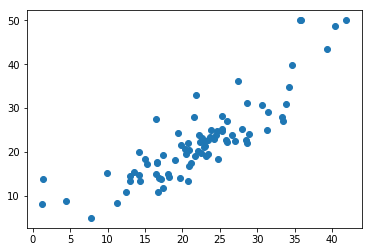

In [11]:
# Your code here


from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X,Y)

print(clf.coef_)

Yth = clf.predict(X_test)
plt.scatter(Y_test, Yth)
plt.plot([0,50], [0,50])
plt.show()

print('RMSE:', np.sqrt(mean_squared_error(Yth, np.array(Y_test))))

## Task 3 - proveďte metodu nejmenších čtverců pomocí gradientního sestupu

* Ručně implementujte gradientní sestup pro hledání $\boldsymbol w$ minimalizujícího $\text{RSS}(\boldsymbol w)$. Gradient je: $\nabla\text{RSS}(\boldsymbol{w}) = -2 \mathbf{X}^T ( \boldsymbol Y - \mathbf X \boldsymbol{w})$.
* Výsledný odhad $\hat{\boldsymbol w}$ porovnejte s $\hat{\boldsymbol w}_{OLS}$ získaným v předchozím bodě.

[[ 0.00042 -0.00304  0.03029 -0.00514  0.00022  0.0001   0.00437 -0.001
   0.00233 -0.00076 -0.00212  0.00446  0.06333 -0.01109]]
RMSE: 8.83313116671628


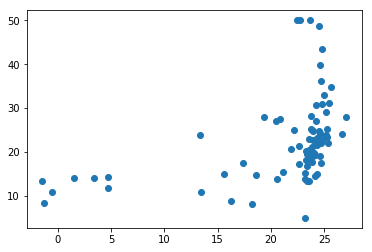

In [18]:
# Your code here


XX = np.matrix(np.concatenate([np.ones((X.shape[0],1)),np.array(X)], axis = 1))
YY = np.matrix(Y).T


max_iter  = 100
alpha = 0.00000001

w = np.zeros([XX.shape[1],1])
for i in range(max_iter):
    grad = -2*XX.T*(YY - XX*w)
    w = w - alpha*grad

print(w.T)

XXt = np.matrix(np.concatenate([np.ones((X_test.shape[0],1)),np.array(X_test)], axis = 1))
Yt_hat = XXt*w
Yth = np.array(Yt_hat).flatten()

plt.scatter(Y_test, Yth)
plt.plot([0,50], [0,50])
plt.show()


from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(Yth, np.array(Y_test))))

## Task 4 - zopakujte Task 3 s tím, že nejprve standardizujete příznaky

Výsledky porovnejte s předchozími.

c:\users\dan\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\dan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
c:\users\dan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


[[22.73183 -0.32042  0.79773 -0.58979  1.12951 -1.14203  2.96537 -0.37148
  -2.53729  1.38402 -0.5781  -1.42146  0.69445 -3.7728 ]]
RMSE: 4.643776608463406


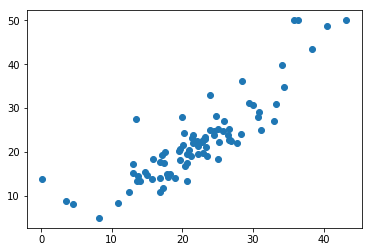

In [16]:
# Your code here


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X2 = scaler.transform(X)
X2_test = scaler.transform(X_test)

XX = np.matrix(np.concatenate([np.ones((X.shape[0],1)),np.array(X2)], axis = 1))
YY = np.matrix(Y).T


max_iter  = 100000
alpha = 0.0000001

w = np.zeros([XX.shape[1],1])
for i in range(max_iter):
    grad = -2*XX.T*(YY - XX*w)
    w = w - alpha*grad

print(w.T)

XXt = np.matrix(np.concatenate([np.ones((X_test.shape[0],1)),np.array(X2_test)], axis = 1))
Yt_hat = XXt*w
Yth = np.array(Yt_hat).flatten()

plt.scatter(Y_test, Yth)
plt.plot([0,50], [0,50])
plt.show()

from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(Yth, np.array(Y_test))))